## import

In [390]:
import numpy as np
import matplotlib.pyplot as plt
import random
import os
import math
import datetime

import seaborn as sns
import pandas as pd
import librosa
import librosa.display
try:
    from dtw import dtw
except:
    !pip install dtw
    from dtw import dtw


try:
    from pydub import AudioSegment
except:
    !pip install pydub
    from pydub import AudioSegment

## Selection aléatoire de quelques drums

In [391]:
def quoiChoose(p, interval):
    res = []
    N = (interval[1] - interval[0])+1
    cb = int(N*p)

    tab = list(range(interval[0],interval[1]+1))
    print(tab)
    while len(res) < cb:
        c = random.choice(tab)
        if c not in res:
            res.append(c)
    return res

quoiChoose( 0.1, [1,40] )

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40]


[21, 4, 13, 10]

## Choix du drumkit 

In [392]:
def CreerDossierSauvegarde(ou,doss):
    nomEmplacementSauvegarde = ou + "/" + doss
    if not os.path.exists(nomEmplacementSauvegarde):
        os.mkdir(nomEmplacementSauvegarde)
        return nomEmplacementSauvegarde
    else:
        return nomEmplacementSauvegarde


In [393]:
# Le dossier de sauvegarde DRIVE
from google.colab import drive,files
drive.mount('/content/gdrive')
!ls /content

DRUMKIT_LEDOSSIER = "/content/gdrive/Shareddrives/# Zone de Code #/Zone de lavage de Drumkits - Data/prodbyjack - THEDRUMCOLLECTION"
print(os.listdir(DRUMKIT_LEDOSSIER))



Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
gdrive	sample_data  test.txt
['Dancehall', 'info.txt', 'Boom Bap - Lofi', 'BONUS', 'Pop', 'Drill - Trap', 'R&B']


In [394]:

def get_all_directory(kit_path,l_veski, res = []):
    if os.path.exists(str(kit_path)):
        for fic in os.listdir(kit_path):
            if fic not in l_veski:
                fic = kit_path + "/" + fic
                if os.path.isdir(fic): #si dossier
                    res.append(fic)
                    res = get_all_directory(fic,l_veski,res)
                    #print(fic)
    return res

l_dossiers_veski = ['Fx - textures','BONUS']
all_dossier_a_analyser_DRUMKIT = set(get_all_directory(DRUMKIT_LEDOSSIER,l_dossiers_veski))

def get_names_files_on(doss):
    listeFichiersAUDIO_names = np.array([f"[{i}] " +  fic for i,fic in enumerate(os.listdir(doss)) if fic.split(".")[-1] in ["mp3", "wav"]  ])
    listeFichiersAUDIO =  np.array([doss + "/" + fic for fic in os.listdir(doss) if fic.split(".")[-1] in ["mp3", "wav"]  ])
    return listeFichiersAUDIO_names, listeFichiersAUDIO 

print(np.array(list(all_dossier_a_analyser_DRUMKIT)))

['/content/gdrive/Shareddrives/# Zone de Code #/Zone de lavage de Drumkits - Data/prodbyjack - THEDRUMCOLLECTION/Dancehall/Snare'
 '/content/gdrive/Shareddrives/# Zone de Code #/Zone de lavage de Drumkits - Data/prodbyjack - THEDRUMCOLLECTION/Boom Bap - Lofi/Open Hat'
 '/content/gdrive/Shareddrives/# Zone de Code #/Zone de lavage de Drumkits - Data/prodbyjack - THEDRUMCOLLECTION/Drill - Trap/Perc'
 '/content/gdrive/Shareddrives/# Zone de Code #/Zone de lavage de Drumkits - Data/prodbyjack - THEDRUMCOLLECTION/Dancehall/Kick'
 '/content/gdrive/Shareddrives/# Zone de Code #/Zone de lavage de Drumkits - Data/prodbyjack - THEDRUMCOLLECTION/Boom Bap - Lofi'
 '/content/gdrive/Shareddrives/# Zone de Code #/Zone de lavage de Drumkits - Data/prodbyjack - THEDRUMCOLLECTION/Dancehall'
 '/content/gdrive/Shareddrives/# Zone de Code #/Zone de lavage de Drumkits - Data/prodbyjack - THEDRUMCOLLECTION/Drill - Trap/Open Hat'
 '/content/gdrive/Shareddrives/# Zone de Code #/Zone de lavage de Drumkits - Dat

## Test • Comparer 2 audios

In [395]:
one_seconds = 1000

listeFichiersAUDIO = get_names_files_on(list(all_dossier_a_analyser_DRUMKIT)[0] ) [1]
file1 = listeFichiersAUDIO[10]
file2 = listeFichiersAUDIO[2]


def AfficherAudio(filename_list, cut_sec):
    if filename_list:
        song = AudioSegment.from_wav(filename_list[0])[0:one_seconds* cut_sec]
        if len(filename_list) > 1:
            for f in filename_list[1:]:
                song += AudioSegment.from_wav(f)[0:one_seconds* cut_sec]

    return song

AfficherAudio([file1,file2],3)

duree 1 : 0.2455328798185941
duree 2 : 0.24108843537414967
Normalized distance between the two sounds: 7747.467712402344


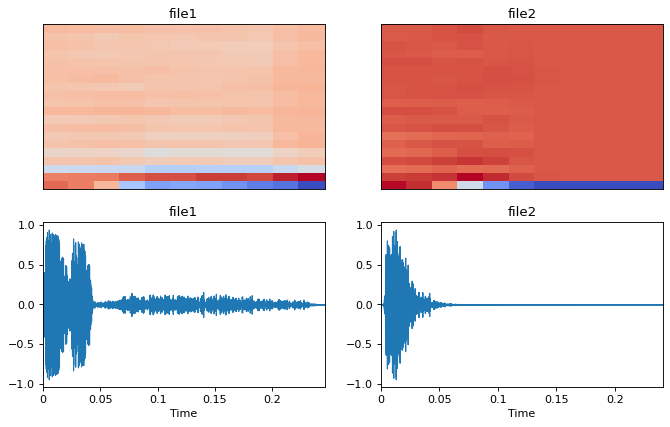

In [396]:
#Loading audio files

plt.figure(figsize=(10, 6), dpi=80)

plt.subplot(2, 2, 3) 
plt.title("file1")
y1, sr1 = librosa.load(file1)
print("duree 1 :",librosa.get_duration(y1))
librosa.display.waveplot(y1, sr1)

plt.subplot(2, 2, 4) 
plt.title("file2")
y2, sr2 = librosa.load(file2) 
print("duree 2 :",librosa.get_duration(y2))
librosa.display.waveplot(y2, sr2)

#Showing multiple plots using subplot
plt.subplot(2, 2, 1) 
plt.title("file1")
mfcc1 = librosa.feature.mfcc(y1,sr1)   #Computing MFCC values
librosa.display.specshow(mfcc1)

plt.subplot(2, 2, 2)
plt.title("file2")
mfcc2 = librosa.feature.mfcc(y2, sr2)
librosa.display.specshow(mfcc2)

from numpy.linalg import norm
dist, cost, acc_cost, path = dtw(mfcc1.T, mfcc2.T, dist=lambda x, y: norm(x - y, ord=1))
print('Normalized distance between the two sounds:', dist )  # 0 for similar audios 

(-0.5, 10.5)

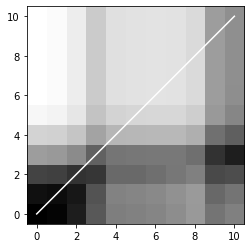

In [397]:
plt.imshow(cost.T, origin='lower', cmap=plt.cm.gray, interpolation='nearest')
plt.plot(path[0], path[1], 'w') #creating plot for DTW
plt.xlim((-0.5, cost.shape[0]-0.5))
plt.ylim((-0.5, cost.shape[1]-0.5))

## Test • Comparer un dossier d'audios

## -> Comparer un drumkit entier

### Les fonctions

In [398]:
%%time

def distance_entre_2_audios(file1,file2):
    #Loading audio files
    y1, sr1 = librosa.load(file1) 
    y2, sr2 = librosa.load(file2) 

    mfcc1 = librosa.feature.mfcc(y1,sr1)   #Computing MFCC values
    mfcc2 = librosa.feature.mfcc(y2, sr2)

    dist, cost, acc_cost, path = dtw(mfcc1.T, mfcc2.T, dist=lambda x, y: norm(x - y, ord=1))
    return dist

distance_entre_2_audios(file1,file2)

CPU times: user 35.5 ms, sys: 13.6 ms, total: 49.1 ms
Wall time: 43.2 ms


In [399]:
def matrice_similitude_listes_audios( l_audios):
    N = len(l_audios)
    tab = np.empty((N,N))
    tab[:] = np.NaN

    for i,fic1 in enumerate(l_audios):
        for j,fic2 in enumerate(l_audios):
            if j < i:
                tab[i][j] = distance_entre_2_audios(fic1,fic2)
            print(f"{int((i/len(l_audios))*100)}%", end="")
    return tab

In [400]:
def CreateHeatMap(tab_dist, col_names ,title):
    df = pd.DataFrame(tab_dist, columns= col_names,index= col_names)
    with sns.axes_style("white"):
        fig, ax = plt.subplots(figsize=(32,32))  
        plt.title(title, fontsize=20)
        ax = sns.heatmap(df,linewidths=.1)
    figure = ax.get_figure()  
    figure.savefig(DRIVE_LEDOSSIER+"/"+title+".png", dpi=400)
    plt.show()

In [401]:
def get_drums_similaires(tab, seuil, listeFichiersAUDIO):
    res = []
    #format_line = '# {:>45} <--> {:>45} : {:>5} '
    for i in range(np.shape(tab)[0]):
        for j in range(np.shape(tab)[1]):
            if j < i:
                if tab[i][j] < seuil:
                    res.append( (     listeFichiersAUDIO[i].split("/")[-1],  listeFichiersAUDIO[j].split("/")[-1], round(tab[i][j],1)       ) ) 
                  
    return res

def print_drums_similaires(res):
    text = f"### {len(res)} couples trouvés ###\n"
    format_line = '# {:>25} <--> {:>25} : {:>5} '
    for i,j, v in res:
        text += format_line.format(i, j, v)
        print( format_line.format(i, j, v)  )
        text += "\n"

    return text

def round_bis(value,step = 1):
    inv = 1 /step
    res = round(value * inv) / inv

    if res < value:
        return res + step
    else:
        return res

def write_resultats_drums(tab, title,listeFichiersAUDIO ):
    #leSeuil = round_bis(np.nanmin(tab), 500 )
    leSeuil = 1250
    text = print_drums_similaires(  get_drums_similaires(tab,leSeuil,listeFichiersAUDIO)   )

    if len(text) > 0:
        with open(DRIVE_LEDOSSIER+"/" + title + '.txt', 'w') as f:
            f.write(text)


#leSeuil = round_bis(np.nanmin(tab), 100)

### GO

# prodbyjack - THEDRUMCOLLECTION-Dancehall-Snare
0%0%0%0%0%0%0%0%0%0%0%0%0%0%7%7%7%7%7%7%7%7%7%7%7%7%7%7%14%14%14%14%14%14%14%14%14%14%14%14%14%14%21%21%21%21%21%21%21%21%21%21%21%21%21%21%28%28%28%28%28%28%28%28%28%28%28%28%28%28%35%35%35%35%35%35%35%35%35%35%35%35%35%35%42%42%42%42%42%42%42%42%42%42%42%42%42%42%50%50%50%50%50%50%50%50%50%50%50%50%50%50%57%57%57%57%57%57%57%57%57%57%57%57%57%57%64%64%64%64%64%64%64%64%64%64%64%64%64%64%71%71%71%71%71%71%71%71%71%71%71%71%71%71%78%78%78%78%78%78%78%78%78%78%78%78%78%78%85%85%85%85%85%85%85%85%85%85%85%85%85%85%92%92%92%92%92%92%92%92%92%92%92%92%92%92%

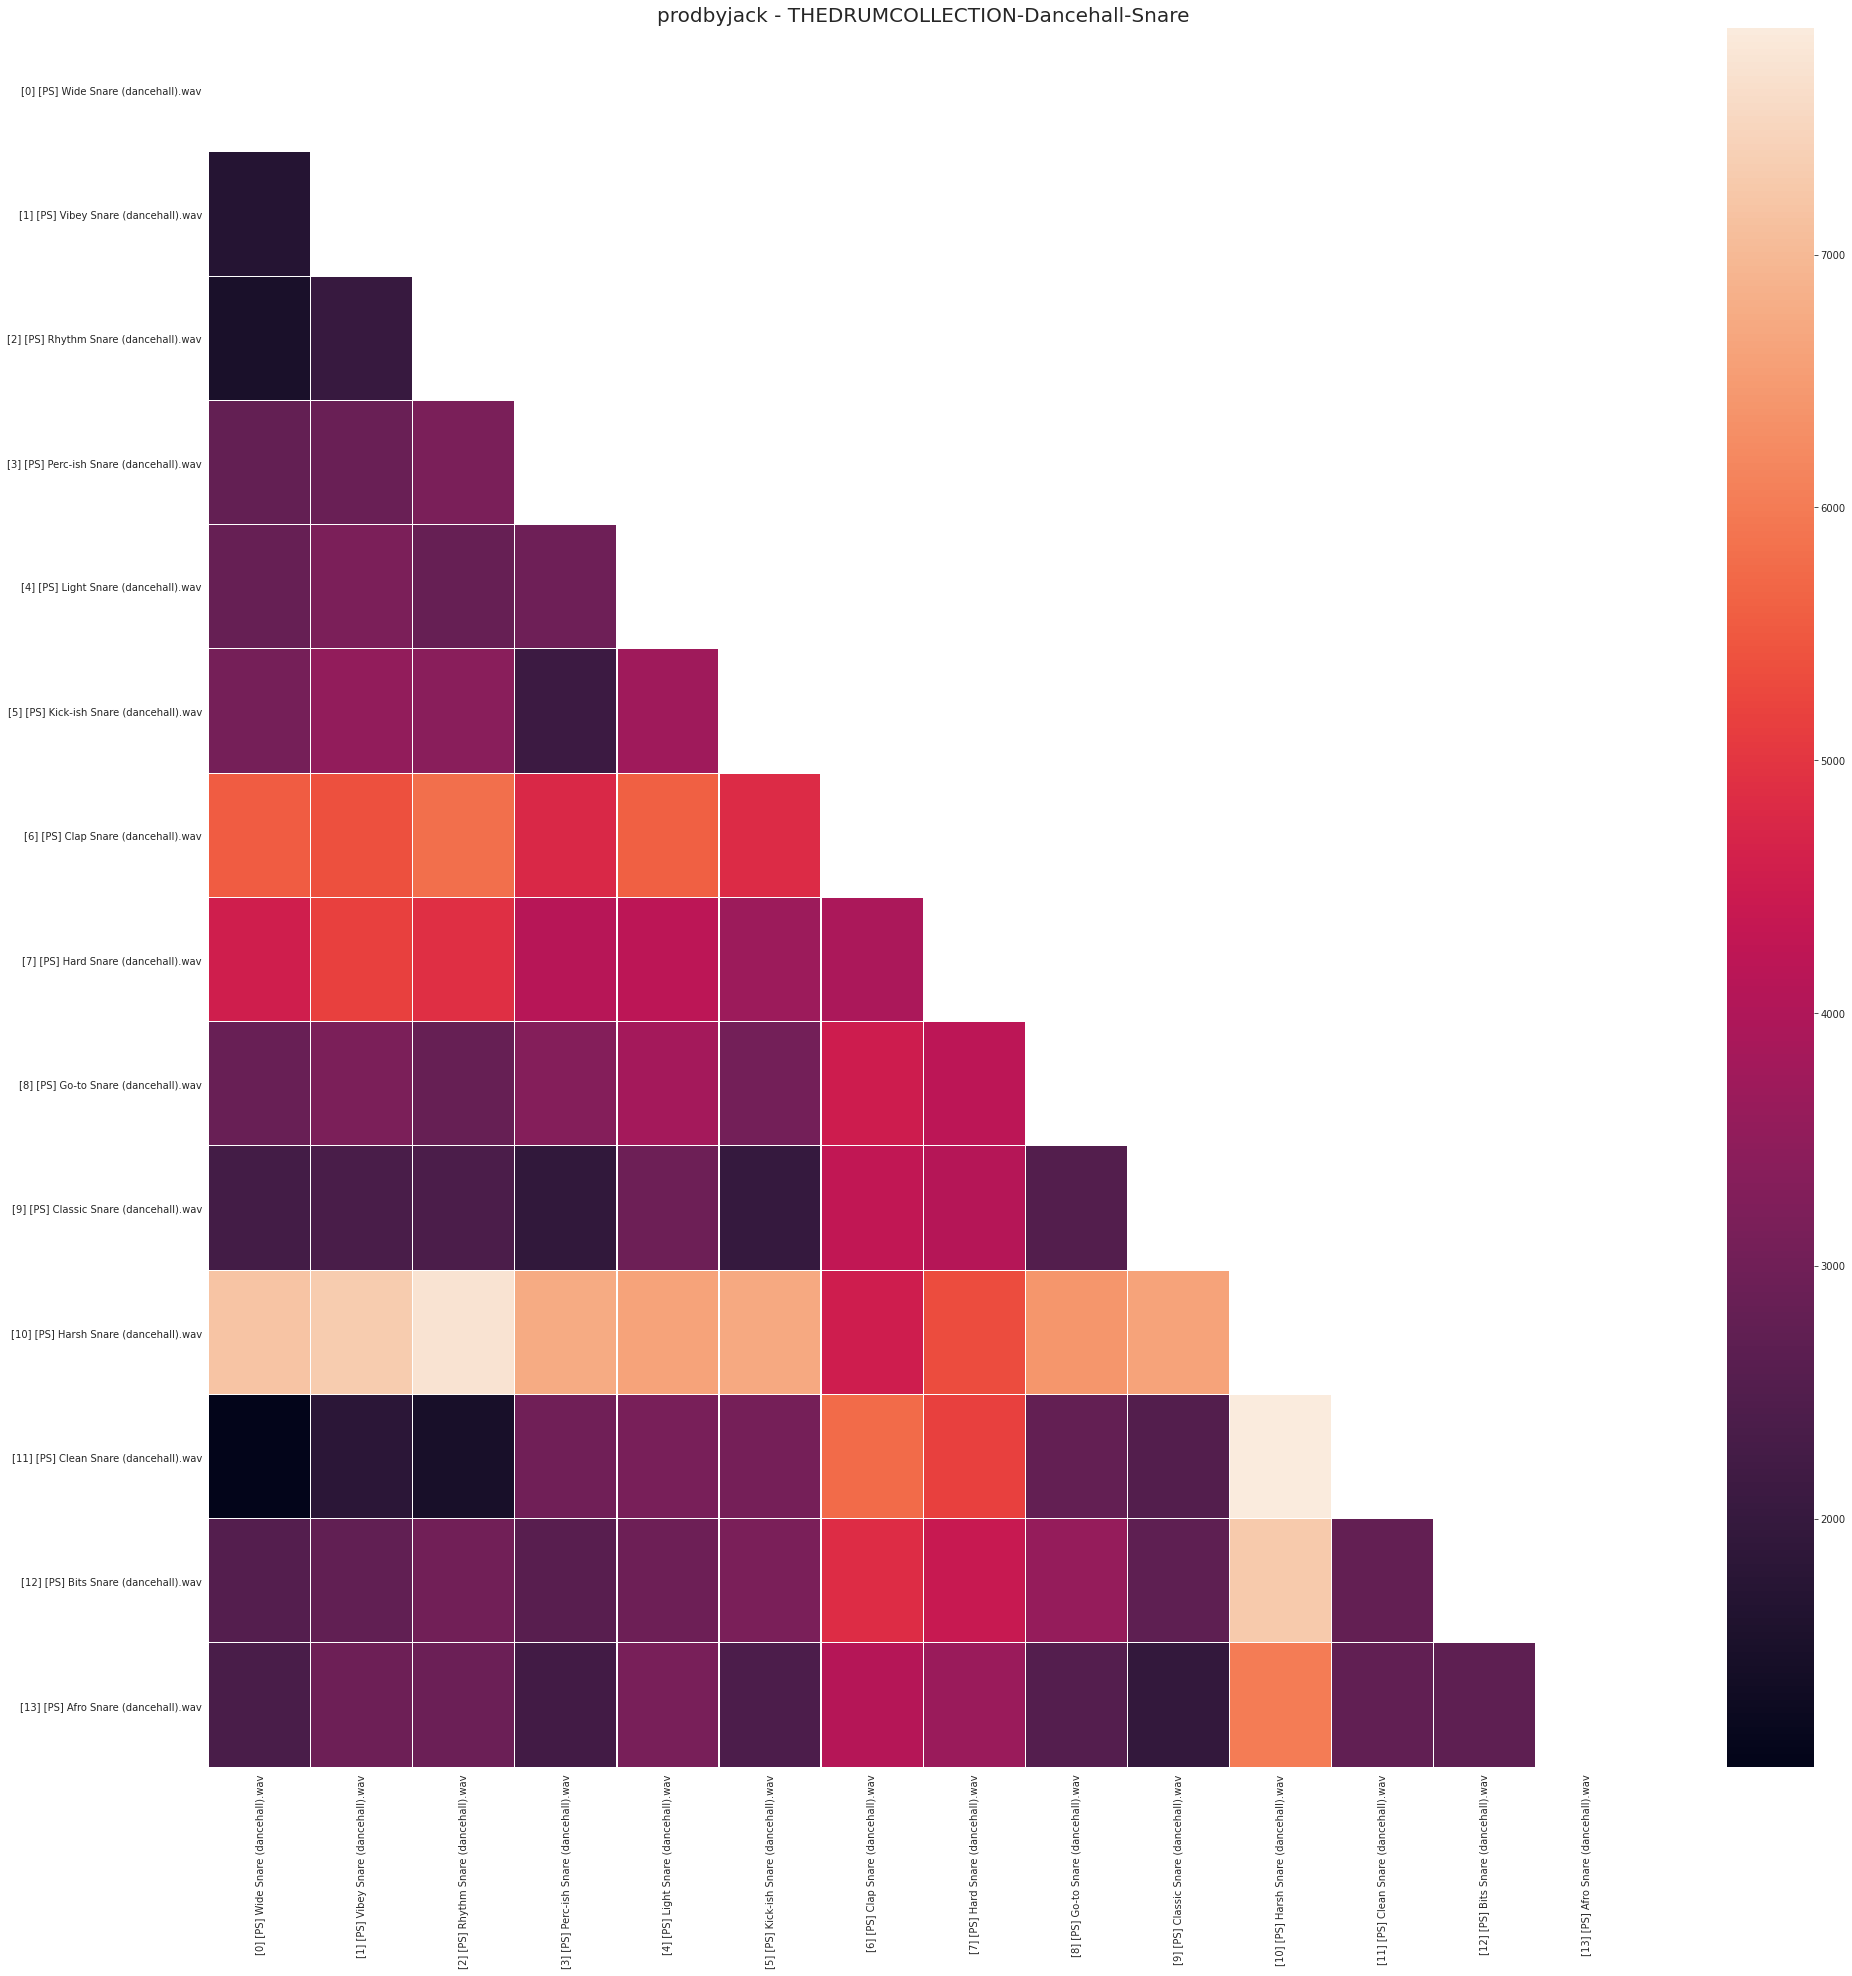

min 1017.1401062011719
# [PS] Clean Snare (dancehall).wav <--> [PS] Wide Snare (dancehall).wav : 1017.1 
# prodbyjack - THEDRUMCOLLECTION-Boom Bap - Lofi-Open Hat
0%0%0%0%0%0%0%0%0%0%0%0%0%0%0%0%0%0%0%0%0%0%0%4%4%4%4%4%4%4%4%4%4%4%4%4%4%4%4%4%4%4%4%4%4%4%8%8%8%8%8%8%8%8%8%8%8%8%8%8%8%8%8%8%8%8%8%8%8%13%13%13%13%13%13%13%13%13%13%13%13%13%13%13%13%13%13%13%13%13%13%13%17%17%17%17%17%17%17%17%17%17%17%17%17%17%17%17%17%17%17%17%17%17%17%21%21%21%21%21%21%21%21%21%21%21%21%21%21%21%21%21%21%21%21%21%21%21%26%26%26%26%26%26%26%26%26%26%26%26%26%26%26%26%26%26%26%26%26%26%26%30%30%30%30%30%30%30%30%30%30%30%30%30%30%30%30%30%30%30%30%30%30%30%34%34%34%34%34%34%34%34%34%34%34%34%34%34%34%34%34%34%34%34%34%34%34%39%39%39%39%39%39%39%39%39%39%39%39%39%39%39%39%39%39%39%39%39%39%39%43%43%43%43%43%43%43%43%43%43%43%43%43%43%43%43%43%43%43%43%43%43%43%47%47%47%47%47%47%47%47%47%47%47%47%47%47%47%47%47%47%47%47%47%47%47%52%52%52%52%52%52%52%52%52%52%52%52%52%52%52%52%52%52%52%52%52%52%52%56%56%56%

In [ ]:
%%time
dateajd = datetime.datetime.now().strftime('%Y-%m-%d')
DRIVE_LEDOSSIER = "/content/gdrive/Shareddrives/# Zone de Code #/• Wanabilini The Producer TOOLS"
DRIVE_LEDOSSIER = CreerDossierSauvegarde(  CreerDossierSauvegarde(DRIVE_LEDOSSIER ,"save"),dateajd + " • " + DRUMKIT_LEDOSSIER.split("/")[-1] )
for dir_drums in set(get_all_directory(DRUMKIT_LEDOSSIER,l_dossiers_veski)):
    
    we_title = "-".join(dir_drums.split("/")[-3:] )
    print('#',we_title)
    listeFichiersAUDIO_names, listeFichiersAUDIO = get_names_files_on(dir_drums)
    # Construire matrice
    tab = matrice_similitude_listes_audios(listeFichiersAUDIO)
    # Graphique 
    CreateHeatMap(tab, listeFichiersAUDIO_names, we_title)
    # Ecrire les fichiers audio similaires
    print("min" , np.nanmin(tab))
    write_resultats_drums(tab,we_title,listeFichiersAUDIO )

In [ ]:
AfficherAudio([listeFichiersAUDIO[11],  listeFichiersAUDIO[0]],  2)